In [10]:
import pandas as pd
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
loansData=pd.read_csv('https://github.com/Thinkful-Ed/curric-data-001-data-sets/raw/master/loans/loansData.csv')
loansData.dropna(inplace=True)
loansData['FICO.Score']=loansData['FICO.Range'].str.split('-',expand=True).astype(int)[0]
loansData['Interest.Rate']=loansData['Interest.Rate'].str.strip('%').astype(float)
loansData['IR_TF']=[0 if x < 12 else 1 for x in loansData['Interest.Rate']]

In [6]:
loansData['Intercept']=1
ind_vars=['Amount.Funded.By.Investors','FICO.Score','Intercept']

In [7]:
logit=sm.Logit(loansData['IR_TF'],loansData[ind_vars])
result=logit.fit()
coeff=result.params
print(coeff)

Optimization terminated successfully.
         Current function value: 0.322737
         Iterations 8
Amount.Funded.By.Investors     0.000170
FICO.Score                    -0.085952
Intercept                     59.194610
dtype: float64


In [8]:
def logistic_function(FICO,LoanAmt,coeff):
    prob = 1/(1 + math.exp(coeff[2] + (coeff[1]*FICO) +(coeff[0]*LoanAmt)))
    return(round(prob,3))

In [9]:
logistic_function(720,10000,coeff)

0.728

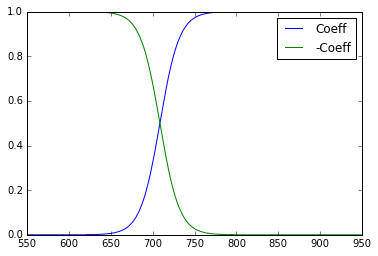

In [15]:
p1 = [logistic_function(x,10000,coeff) for x in range(550,950)]
p2 = [logistic_function(x,10000,-1*coeff) for x in range(550,950)]
plt.plot(range(550,950),p1)
plt.plot(range(550,950),p2)
plt.legend(['Coeff','-Coeff'])
plt.show()

In [19]:
loansData[loansData['Amount.Funded.By.Investors']==10000].head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,FICO.Score,IR_TF,Intercept
48808,10000,10000.0,7.90,36 months,debt_consolidation,26.09%,MA,RENT,2916.67,720-724,10.0,15957.0,0.0,10+ years,720,0,1
62127,10000,10000.0,12.12,36 months,debt_consolidation,17.72%,CA,RENT,9000.00,695-699,18.0,20317.0,0.0,7 years,695,1,1
44987,10000,10000.0,9.76,36 months,credit_card,7.13%,FL,RENT,2733.33,730-734,7.0,6112.0,2.0,3 years,730,0,1
61703,10000,10000.0,17.77,36 months,wedding,30.40%,NY,OWN,2500.00,665-669,5.0,8379.0,0.0,8 years,665,1,1
67158,10000,10000.0,14.09,36 months,debt_consolidation,21.45%,CO,RENT,4583.33,675-679,11.0,8548.0,0.0,6 years,675,1,1


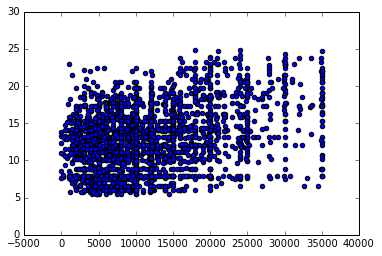

In [21]:
plt.scatter(loansData['Amount.Funded.By.Investors'],loansData['Interest.Rate'])

In [24]:
cd Desktop/Python/Thinkful/Thinkful-Unit2/

C:\Users\Danius\Desktop\Python\Thinkful\Thinkful-Unit2
